<a href="https://colab.research.google.com/github/Shivaram17/DataScience_Projects/blob/main/DataAnalysis_Project_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
path = r'USA_gov.txt'
'''converting a JSON string into a
   Python dictionary object.'''
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [ ]:
# Counting time zones in Pure Python
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
len(set(time_zones))
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [ ]:
# find the count of time zones using dictionary approach
def get_counts(sequence):
  count = {}
  for i in sequence:
    if i in count:
      count[i] += 1 
    else:
      count[i] =1
  return count
counts = get_counts(time_zones)
counts

{'': 521,
 'Africa/Cairo': 3,
 'Africa/Casablanca': 1,
 'Africa/Ceuta': 2,
 'Africa/Johannesburg': 1,
 'Africa/Lusaka': 1,
 'America/Anchorage': 5,
 'America/Argentina/Buenos_Aires': 1,
 'America/Argentina/Cordoba': 1,
 'America/Argentina/Mendoza': 1,
 'America/Bogota': 3,
 'America/Caracas': 1,
 'America/Chicago': 400,
 'America/Chihuahua': 2,
 'America/Costa_Rica': 1,
 'America/Denver': 191,
 'America/Edmonton': 6,
 'America/Guayaquil': 2,
 'America/Halifax': 4,
 'America/Indianapolis': 20,
 'America/La_Paz': 1,
 'America/Lima': 1,
 'America/Los_Angeles': 382,
 'America/Managua': 3,
 'America/Mazatlan': 1,
 'America/Mexico_City': 15,
 'America/Monterrey': 1,
 'America/Montevideo': 1,
 'America/Montreal': 9,
 'America/New_York': 1251,
 'America/Phoenix': 20,
 'America/Puerto_Rico': 10,
 'America/Rainy_River': 25,
 'America/Recife': 2,
 'America/Santo_Domingo': 1,
 'America/Sao_Paulo': 33,
 'America/St_Kitts': 1,
 'America/Tegucigalpa': 1,
 'America/Vancouver': 12,
 'America/Winnipeg':

In [ ]:
# using default dict
from collections import defaultdict

def get_counts2(sequence):
  count = defaultdict(int)
  for i in sequence:
    count[i] +=1
  return  count
get_counts2(time_zones)


defaultdict(int,
            {'': 521,
             'Africa/Cairo': 3,
             'Africa/Casablanca': 1,
             'Africa/Ceuta': 2,
             'Africa/Johannesburg': 1,
             'Africa/Lusaka': 1,
             'America/Anchorage': 5,
             'America/Argentina/Buenos_Aires': 1,
             'America/Argentina/Cordoba': 1,
             'America/Argentina/Mendoza': 1,
             'America/Bogota': 3,
             'America/Caracas': 1,
             'America/Chicago': 400,
             'America/Chihuahua': 2,
             'America/Costa_Rica': 1,
             'America/Denver': 191,
             'America/Edmonton': 6,
             'America/Guayaquil': 2,
             'America/Halifax': 4,
             'America/Indianapolis': 20,
             'America/La_Paz': 1,
             'America/Lima': 1,
             'America/Los_Angeles': 382,
             'America/Managua': 3,
             'America/Mazatlan': 1,
             'America/Mexico_City': 15,
             'America/Monte

In [ ]:
# usning collections and Counter
from collections import Counter
counts = Counter(time_zones)
counts.most_common(25)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28),
 ('Europe/Rome', 27),
 ('America/Rainy_River', 25),
 ('Europe/Amsterdam', 22),
 ('America/Phoenix', 20),
 ('America/Indianapolis', 20),
 ('Europe/Warsaw', 16),
 ('America/Mexico_City', 15),
 ('Europe/Paris', 14),
 ('Europe/Stockholm', 14),
 ('America/Vancouver', 12),
 ('Pacific/Auckland', 11),
 ('Asia/Hong_Kong', 10),
 ('Europe/Prague', 10),
 ('Europe/Moscow', 10)]

In [ ]:
# using pandas to find the counts of time zones
import pandas as pd
frame = pd.DataFrame(records)
# frame.info()
frame['tz'][:10]
# value_counts
tz_counts = frame['tz'].value_counts()
tz_counts

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: tz, Length: 97, dtype: int64

In [ ]:
# munging 
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

[Text(0.5, 1.0, 'Top time zones of USA')]

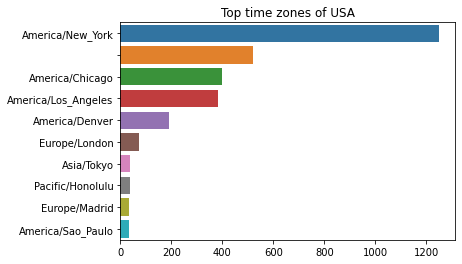

In [ ]:
# seaborn
import seaborn as sns
subset = tz_counts[:10]
barp = sns.barplot(y = subset.index, x = subset.values)
barp.set(title = 'Top time zones of USA')


In [ ]:
# parsing a browser in the dataframe
frame['a'][50]
# split off the first token in the string 
result = pd.Series(x.split()[0] for x in frame['a'].dropna())
result[:5]
# counts for browsers
result_counts = result.value_counts()[:10]
result_counts

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [ ]:
# finding windows and non-windows error
import numpy as np
cframe = frame[frame['a'].notnull()]
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
cframe['os'][:8]
# group data by it's time zone column
by_tz_os = cframe.groupby(['tz', 'os'])
by_tz_os = by_tz_os.size().unstack().fillna(0)
by_tz_os


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64